In [84]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from IPython.display import display, Markdown, Latex
import pandas as pd
from uncertainties import ufloat
from uncertainties import unumpy as unp
from scipy.optimize import curve_fit
from scipy import constants as const 

# PW7

## Experiment 1:

Grundsätzlich kann man Wärmeübertragung über drei Wege erreichen. Mit einem Übertragungsmedium kann es im Lichte der Wärmeübertragung entweder zu Konvektion oder Wärmeleitung kommen. Ersteres tritt mit bzw. durch Stoffbewegung auf, während letzteres auftritt, wenn es keine Stoffbewegung gibt.
In diesem ersten Experiment wird die Wärmeübertragung ohne Übertragungsmedium, also über Strahlung, näher betrachtet.
Das Experiment besteht aus einer Glühlampe mit monochromatischem Filter, welche an eine variable Spannungsversorgung angeschlossen ist, einer Fotozelle mit integriertem Strom-Spannungs-Wandler und einer optischen Bank, mit welcher der Abstand der Glühlampe und der Fotozelle ermittelt werden kann.
Bei leuchtender Glühlampe kommt es in der Fotozelle zu einem elektrischen Strom, welcher direkt proportional zur Beleuchtungsstärke E ist. Weil dieser sehr klein ist, verwendet man einen Strom-Spannungswandler, der eine Spannung U erzeugt, welche erneut direkt proportional zu Fotostrom ist. Somit ist die Spannung U proportional zur Beleuchtungsstärke E.
Nun wird die gemessene Spannung U auf den Abstand r graphisch aufgetragen. Das Verhältnis zwischen E und r ist gegeben durch $E = \frac{C I}{r^2}$
. Der Verlauf soll einem linearen Anstieg gleichen, wodurch man mittels eines Fits die Steigung a = CI ermitteln kann, wobei C eine Konstante ist und I die Lichtstärke. Führt man dies für zwei verschiedene Betriebsbedingungen durch, erhält man folgende Verhältnisse: 
$$
\frac{I_1}{I_2} = \frac{a_1}{a_2}
$$

Zum Schluss werden die dazugehörigen Leistungen P1 und P2, sowie die Strahlungstemperaturen der beiden Betriebsbedingungen ermittelt. Dafür bedient man sich folgenden Gleichungen:
$$
\frac{P_1}{P_2} = \frac{T_1^{4}}{T_2^{4}}
$$
$$
\ln\!\left(\frac{I_1}{I_2}\right)
= \frac{1}{T_1}
\left[
\left(\frac{P_1}{P_2}\right)^{1/4} - 1
\right]
\left(\frac{c h}{k \lambda}\right)
$$


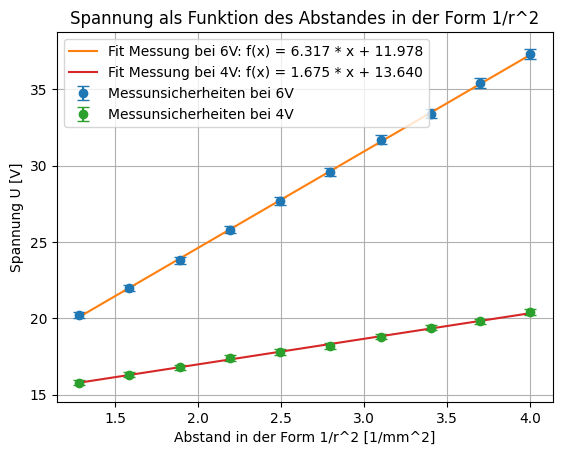

Aus der Steigung des ersten Fits geht hervor, dass bei der Spannung von 6V die Intensität I mal der Konstante C 6.317 +/- 0.093 ist. Für die Messung bei 4V beträgt C*I 1.675 +/- 0.064.
Das Verhältnis der beiden Lichtstärken zueinander beträgt 3.7724256581614.
Die elektrische Leistung unter der ersten Betriebsbedingung liegt bei 28.17+/-0.28W, für die zweite Messreihe beträgt sie 15.08+/-0.18W.
Bei der Einstellung von 6V hatte das Licht (3.16+/-0.08)e+03°C, bei 4V waren es (2.70+/-0.06)e+03°C.


In [85]:
#1.1

# e entspricht gemessener spannung u

# bedingung 1 = 6V
# e_messwerte_1 = np.array([38.7, 37.1, 35.2, 33.0, 31.0, 28.9, 26.8, 25.2, 23, 21.0]) erste messreihe, vermutlich falsch # in mV
e_messwerte_1 = np.array([37.3, 35.4, 33.4, 31.7, 29.6, 27.7, 25.8, 23.8, 22, 20.2]) # in mV
e_unsicherheiten_1 = (e_messwerte_1*0.008) + 0.03
unsicherheiten_für_fit_1 = unp.nominal_values(e_unsicherheiten_1)
e_werte_1 = unp.uarray(e_messwerte_1, e_unsicherheiten_1)

r_messwerte_1 = np.array([0.5, 0.52, 0.542, 0.568, 0.598, 0.633, 0.675, 0.727, 0.794, 0.882])
r_unsicherheiten_1 = 0.0001 # in m
r_werte_1 = unp.uarray(r_messwerte_1, r_unsicherheiten_1)
r_als_quotient_1 = 1/(r_werte_1)**2
r_quot_nom_1 = unp.nominal_values(r_als_quotient_1)

# bedingung 2 = 4V
e_messwerte_2 = np.array([20.4, 19.8, 19.4, 18.8, 18.2, 17.8, 17.4, 16.8, 16.3, 15.8]) # in mV
e_unsicherheiten_2 = (e_messwerte_2*0.008) + 0.03 
unsicherheiten_für_fit_2 = unp.nominal_values(e_unsicherheiten_2)
e_werte_2 = unp.uarray(e_messwerte_2, e_unsicherheiten_2)

r_messwerte_2 = r_messwerte_1
r_unsicherheiten_2 = r_unsicherheiten_1
r_werte_2 = r_werte_1
r_als_quotient_2 = r_als_quotient_1
r_quot_nom_2 = r_quot_nom_1

x = unp.nominal_values(r_als_quotient_1)

def linear(x, m, b):
    return m*x + b

popt, pcov = curve_fit(linear, x, e_messwerte_1, sigma=unsicherheiten_für_fit_1, absolute_sigma=True)
m, b = popt
dm, db = np.sqrt(np.diag(pcov))

x_fit = np.linspace(x.min(), x.max(), 200)
y_fit = linear(x_fit, m, b)

v = unp.nominal_values(r_als_quotient_2)

def linear2(v, c, d):
    return c*v + d

popt, pcov = curve_fit(linear2, v, e_messwerte_2, sigma=unsicherheiten_für_fit_2, absolute_sigma=True)
c, d = popt
dc, dd = np.sqrt(np.diag(pcov))

v_fit = np.linspace(v.min(), v.max(), 200)
w_fit = linear2(v_fit, c, d)

# gegeneinander auftragen e bzw u anpassen
plt.errorbar(r_quot_nom_1, e_messwerte_1, yerr=e_unsicherheiten_1, fmt="o", capsize=4, label="Messunsicherheiten bei 6V") #anpassen
plt.plot(x_fit, y_fit, label=f"Fit Messung bei 6V: f(x) = {m:.3f} * x + {b:.3f}")

plt.errorbar(r_quot_nom_2, e_messwerte_2, yerr=e_unsicherheiten_2, fmt="o", capsize=4, label="Messunsicherheiten bei 4V")
plt.plot(v_fit, w_fit, label=f"Fit Messung bei 4V: f(x) = {c:.3f} * x + {d:.3f}")

plt.xlabel("Abstand in der Form 1/r^2 [1/mm^2]") #einheit?????
plt.ylabel("Spannung U [V]") #einheiten????
plt.title("Spannung als Funktion des Abstandes in der Form 1/r^2")
plt.legend()
plt.grid(True)
plt.show()

print(f"Aus der Steigung des ersten Fits geht hervor, dass bei der Spannung von 6V die Intensität I mal der Konstante C {m:.3f} +/- {dm:.3f} ist. Für die Messung bei 4V beträgt C*I {c:.3f} +/- {dc:.3f}.")

verhältnis = m/c

print(f"Das Verhältnis der beiden Lichtstärken zueinander beträgt {verhältnis}.")

v1 = ufloat(6, (6*0.003) + 0.03) #v
a1 = ufloat(4.695, (4.695*0.005)+0.003) #a
p1 = v1*a1 #v mal a
v2 = ufloat(4, (4*0.003) + 0.03)
a2= ufloat(3.771, (3.771*0.005)+0.003)
p2 = a2 * v2
f =  const.Boltzmann * 580*10**(-9) #k mal lambda von 680 nm
g = const.c * const.h # lichtgeschwindigkeit mal plancksches wirkungsquantum

t1 = (((p1/p2)**(1/4))-1)*(g/f)/(np.log(verhältnis)) 
t2 = ((1-((p2/p1)**(1/4)))*(g/f))/np.log(verhältnis) 

print(f"Die elektrische Leistung unter der ersten Betriebsbedingung liegt bei {p1}W, für die zweite Messreihe beträgt sie {p2}W.")
print(f"Bei der Einstellung von 6V hatte das Licht {t1}°C, bei 4V waren es {t2}°C.")



## Experiment 2

Beim zweiten Experiment ist die Wärmeleitfähigkeit von Aluminium mittels thermografischer Auswertung von einem stationären Wärmestrom zu bestimmen. Das soll mit einer Wärmebildkamera geschehen.
Damit man es mit einem stationären Wärmestrom längs eines Metallstabes zu tun hat, muss jener zwischen einer Wärmequelle mit konstanter Heizleistung und Wärmesenke angebracht sein.
Nimmt man nun den Aufbau mit einer Wärmebildkamera auf, sieht man eine Verteilung verschiedener Temperaturen in Abhängigkeit vom Ort, welche folgender Relation entspricht:
$$ 
\frac{\Delta Q}{\Delta t} = - \lambda A \frac{\Delta T}{\Delta x} 
$$

Die Querschnittsfläche A wird mittels Schublehre ermittelt. Durch die Auswertung der Daten der Wärmebildkamera mit dem Programm „BMT“ erhält man die Temperaturverteilung T(x) und durch einen linearen Fit erhält man die Steigung ΔT/ Δx. Da in dem Aufbau ein Heizwiderstand R = 330Ω an einer Spannung U = 14V anliegt lässt sich $\frac{\Delta Q}{\Delta t} = P = \frac{U^2}{R}$ als 0,60 W ermitteln und somit ist die Wärmeleitfähigkeit λ bestimmbar!

In [ ]:
# 2.

A = ufloat(9.8 * 4.3 * 10**(-6), 4.9*10**(-7)) #fläche, gemessen in mm^2 # länge 584 mm
anstieg = ufloat(0.8528 * 10**2, 0.00533) #steigung, aus scidavis (K/cm)*10^2
t = 0.6 # K!!!! also auch C, konstanter wärmeunterschied

lambda_ = (t/(anstieg*A)) #wärmeleitfähigkeit

print(f"Die Wärmeleitfähigkeit des Materials ist {lambda_} J/msK, dementsprechend handelt es sich bei der untersuchten Probe um Duraluminium mit einer Wärmeleitfähigkeit von 170 J/msK (siehe Anleitungstext).") # anpassen!!!!, differenz

# tabelle aus dem anleitungstext




Die Wärmeleitfähigkeit des Materials ist 167.0+/-1.9 J/msK, dementsprechend handelt es sich bei der untersuchten Probe um Duraluminium mit einer Wärmeleitfähigkeit von 170.


## Diskussion

Bei der Spannungsmessung im 1. Experiment war eine gewisse Aufwärmzeit zu beachten, bis sich die Spannungen eingestellt haben. 
Im 2. Experiment mit der Wärmebildkamera könnte eine gewisse Unsicherheit aus der Messung der Länge des Aluminiumplättchens kommen, weil die Auswahl des Messbeginns am Bild im BMT-Programm auf den Pixel genau erfolgt, was natürlich in der Realität nicht funktioniert. Weiters ist das Scharfstellen der Kamera auch nur bis zu einem bestimmten Grad möglich und somit das Auswerten wieder etwas verkompliziert. Anders als im Skript gegeben beläuft sich unser Temperaturunterschied auf 4,5 Grad Kelvin und nicht 4.